## Decision Tree and Random Forest classification models training (Malware)

In [9]:
"""
Malware Decision Tree and Random Forest TF-IDF-based classification models
"""
__author__ = "Alisher Mazhirinov"

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [11]:
malware = pd.read_csv('6_final_feature_extraction/malware_word_count.csv')
benign = pd.read_csv('6_final_feature_extraction/benignMalware_word_count.csv')

In [12]:
exclude_cols = ['domain_name','label','language','malicious_tags','all_tags','word_count','domain_length']
malware_cols = [col for col in malware.columns if col not in exclude_cols]
# Calculate the sum of all tf-idf features
malware['tfidf_malware_total'] = malware[malware_cols].sum(axis=1)
# Delete rows with zero values
malware = malware[malware['tfidf_malware_total'] > 0].reset_index(drop=True)
malware

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,help,new,contact,...,management,health,events,news,find,online,standard,search,school,tfidf_malware_total
0,adishankaracharyavedic.com,1,en,1,175,318,26,2,2,2,...,0,0,0,0,0,0,0,0,0,9
1,www.nirjhara.com,1,en,15,1298,1606,16,0,0,2,...,0,0,1,1,0,0,0,0,0,32
2,eloquentcs.com,1,en,7,165,309,14,0,0,3,...,0,1,0,0,0,0,0,0,0,8
3,cbscolleges.in,1,en,1,581,733,14,0,4,3,...,0,2,3,2,0,0,0,0,0,23
4,griincom.co.ke,1,en,43,683,404,14,0,0,4,...,0,0,0,0,0,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,combrokers.com,1,en,2,142,307,14,0,1,1,...,2,0,0,2,2,0,1,0,0,30
5948,basithamitech.com,1,en,21,426,883,17,3,0,3,...,1,0,0,0,0,0,1,0,0,63
5949,ardesia.ph,1,en,29,550,582,10,0,0,2,...,0,2,3,0,1,0,0,0,0,14
5950,saisiddhipls.com,1,en,22,173,112,16,0,0,2,...,0,0,0,0,0,0,0,0,6,13


In [13]:
# Do the same with benign dataset
benign_cols = [col for col in benign.columns if col not in exclude_cols]
benign['tfidf_malware_total'] = benign[benign_cols].sum(axis=1)
benign = benign[benign['tfidf_malware_total'] > 0].reset_index(drop=True)
# Make benign dataset contain the same amount of features as in malware dataset
benign = benign.sort_values(by='tfidf_malware_total', ascending=False).head(5952).reset_index(drop=True)
benign

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,help,new,contact,...,management,health,events,news,find,online,standard,search,school,tfidf_malware_total
0,nailboo.com,0,en,2148,17363,7699,11,3,2,1,...,0,0,0,0,3,0,0,1,0,1226
1,shipour.wedding,0,en,104,7539,8503,15,15,9,2,...,0,0,3,0,0,8,0,2,0,945
2,www.waldenu.edu,0,en,448,4472,7100,15,17,6,5,...,58,95,2,2,7,73,0,15,9,657
3,christensen.co.za,0,en,46,8389,4957,17,3,0,4,...,0,0,0,0,3,0,0,4,0,640
4,costcoauto.com,0,en,38,1217,8081,14,4,9,9,...,0,0,3,0,5,7,1,3,0,611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,mmlafleur.com,0,en,11,1417,1330,13,0,19,2,...,0,0,7,0,0,0,0,2,0,41
5948,auburn.edu,0,en,29,620,893,10,1,1,1,...,0,1,2,2,3,0,0,2,2,41
5949,newyorkyimby.com,0,en,10,8029,5005,16,0,19,1,...,2,0,0,1,0,0,0,1,0,41
5950,catchmarketingservices.com,0,en,4,305,434,26,0,0,3,...,4,0,0,0,1,0,0,11,0,41


In [14]:
# Concatenate two datasets
combined_df = pd.concat([malware, benign], ignore_index=True)
# Shuffle them in random order
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,help,new,contact,...,management,health,events,news,find,online,standard,search,school,tfidf_malware_total
0,heas.health.vic.gov.au,0,en,25,1728,1963,22,2,0,1,...,0,23,4,7,15,1,0,4,9,170
1,brightkidsformula.com,1,en,21,585,522,21,0,1,1,...,0,3,0,0,0,3,0,2,0,33
2,danaburkart.com,1,en,1,36,34,15,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,wgtechexpress.com,1,en,5,20,86,17,0,0,0,...,0,0,0,0,0,2,0,0,0,7
4,bloomington.k12.mn.us,0,en,6,1005,889,21,4,8,3,...,0,2,2,3,3,2,0,1,46,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11899,aesthetique.me.uk,0,en,81,843,830,17,3,1,2,...,0,0,0,0,0,0,1,0,0,46
11900,bitlq.app,1,en,2,359,2837,9,11,4,2,...,1,0,0,0,3,1,0,0,0,221
11901,annuitybroker.ca,1,en,5,111,79,16,0,0,0,...,0,0,0,0,0,0,0,1,0,1
11902,ratom.in,1,en,31,2215,325,8,1,0,3,...,0,0,0,0,0,1,0,0,0,19


In [15]:
# Delete all unnecessary features + overfitted features
shuffled_df = shuffled_df.drop(columns=['language', 'domain_name', 'word_count', 'domain_length', 'all_tags', 
                                         'contact', 'new', 'news',
                                         'privacy', 'policy',
                                         'malicious_tags', 'tfidf_malware_total'])
# shuffled_df.to_csv('7_output_files/main_bm_dataset.csv', index=False)

## Random Forest and Decision Tree models

In [16]:
y = shuffled_df['label']
X = shuffled_df.drop(['label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)


print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Random Forest Accuracy: 0.8776595744680851
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1817
           1       0.89      0.85      0.87      1755

    accuracy                           0.88      3572
   macro avg       0.88      0.88      0.88      3572
weighted avg       0.88      0.88      0.88      3572

Decision Tree Accuracy: 0.7872340425531915
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.79      1817
           1       0.77      0.81      0.79      1755

    accuracy                           0.79      3572
   macro avg       0.79      0.79      0.79      3572
weighted avg       0.79      0.79      0.79      3572



## Printing feature importance

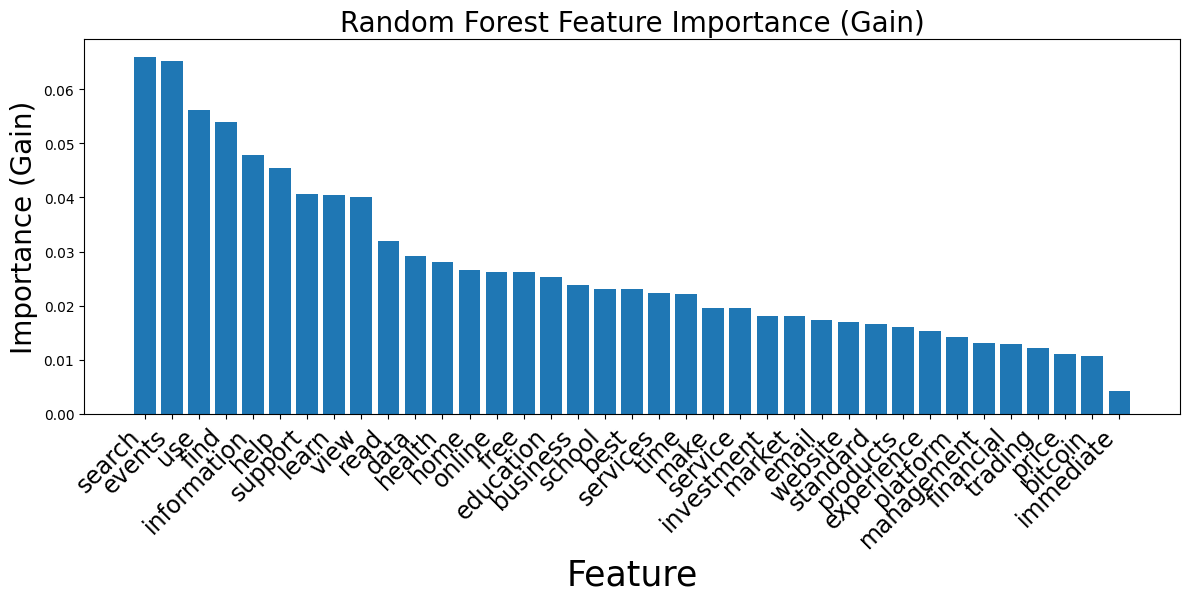

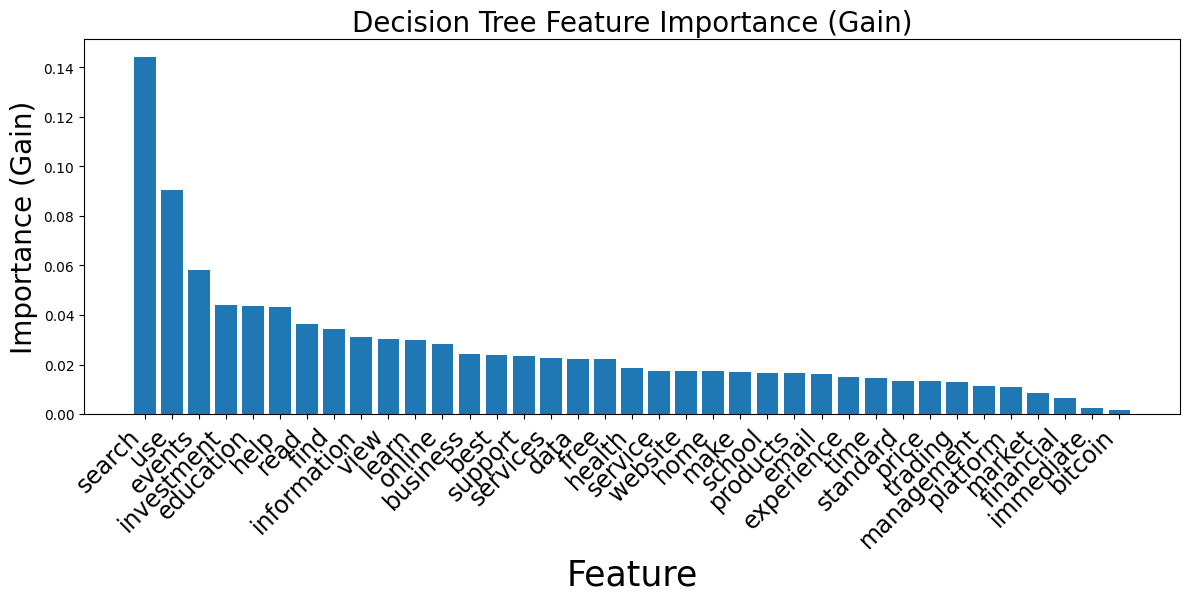

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Feature Importance using Gain (MDI - Mean Decrease in Impurity)
def plot_feature_importance_gain(model, feature_names, title, top_n=37):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Оставляем только top_n признаков
    indices = indices[:top_n]
    top_features = np.array(feature_names)[indices]
    top_importances = importances[indices]

    plt.figure(figsize=(12, 6))
    plt.title(title, fontsize=20)
    plt.bar(range(top_n), top_importances, align="center")
    plt.xticks(range(top_n), top_features, rotation=45, ha="right", fontsize=17)

    plt.xlabel("Feature", fontsize=25)
    plt.ylabel("Importance (Gain)", fontsize=20)

    plt.tight_layout()
    plt.subplots_adjust(bottom=0.3)
    plt.show()
# Plot Gain-based Feature Importance for Random Forest
plot_feature_importance_gain(rf_model, X.columns, "Random Forest Feature Importance (Gain)")

# Plot Gain-based Feature Importance for Decision Tree
plot_feature_importance_gain(dt_model, X.columns, "Decision Tree Feature Importance (Gain)")


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from optuna.integration import OptunaSearchCV
import optuna

## Grid Search

In [19]:
# Hyperparameter Tuning for RandomForest
rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

best_rf_params = rf_grid_search.best_params_
print("Best parameters for RandomForest (Grid Search):", best_rf_params)

# Training RandomForest with Best Parameters
rf_optimized_grid = RandomForestClassifier(**best_rf_params, random_state=42)
rf_optimized_grid.fit(X_train, y_train)

y_pred_rf = rf_optimized_grid.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Best parameters for RandomForest (Grid Search): {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Random Forest Accuracy: 0.8748600223964166
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1817
           1       0.89      0.85      0.87      1755

    accuracy                           0.87      3572
   macro avg       0.88      0.87      0.87      3572
weighted avg       0.88      0.87      0.87      3572



In [20]:
# Hyperparameter Tuning for DecisionTree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

best_dt_params = dt_grid_search.best_params_
print("Best parameters for DecisionTree (Grid Search):", best_dt_params)

# Training DecisionTree with Best Parameters
dt_optimized_grid = DecisionTreeClassifier(**best_dt_params, random_state=42)
dt_optimized_grid.fit(X_train, y_train)

y_pred_dt = dt_optimized_grid.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Best parameters for DecisionTree (Grid Search): {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
Decision Tree Accuracy: 0.7961926091825308
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      1817
           1       0.78      0.81      0.80      1755

    accuracy                           0.80      3572
   macro avg       0.80      0.80      0.80      3572
weighted avg       0.80      0.80      0.80      3572



## Optuna Search

In [ ]:
# Optimization with Optuna for RandomForest
rf = RandomForestClassifier(random_state=42)
rf_param_dist = {
    'n_estimators': optuna.distributions.IntDistribution(50, 200),
    'max_depth': optuna.distributions.IntDistribution(5, 30),
    'min_samples_split': optuna.distributions.IntDistribution(2, 10)
}

optuna_rf_search = OptunaSearchCV(rf, rf_param_dist, cv=5, scoring='accuracy', n_trials=12)
optuna_rf_search.fit(X_train, y_train)

best_rf_optuna_params = optuna_rf_search.best_params_
print("Best parameters for RandomForest (Optuna Search):", best_rf_optuna_params)

# Training RandomForest with Best Parameters
rf_optimized = RandomForestClassifier(**best_rf_optuna_params, random_state=42)
rf_optimized.fit(X_train, y_train)

y_pred_rf = rf_optimized.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


C:\Users\kolok\AppData\Local\Temp\ipykernel_4068\2685113660.py:9: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_rf_search = OptunaSearchCV(rf, rf_param_dist, cv=5, scoring='accuracy', n_trials=12)
[I 2025-05-11 03:02:55,411] A new study created in memory with name: no-name-d1c9d0ae-f87b-4460-a749-71e5184c8ca0


In [28]:
# Optimization with Optuna for DecisionTree
dt = DecisionTreeClassifier(random_state=42)
dt_param_dist = {
    'max_depth': optuna.distributions.IntDistribution(5, 30),
    'min_samples_split': optuna.distributions.IntDistribution(2, 10)
}

optuna_dt_search = OptunaSearchCV(dt, dt_param_dist, cv=5, scoring='accuracy', n_trials=15)
optuna_dt_search.fit(X_train, y_train)

best_dt_optuna_params = optuna_dt_search.best_params_
print("Best parameters for DecisionTree (Optuna Search):", best_dt_optuna_params)

# Training DecisionTree with Best Parameters
dt_optimized = DecisionTreeClassifier(**best_dt_optuna_params, random_state=42)
dt_optimized.fit(X_train, y_train)

y_pred_dt = dt_optimized.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

C:\Users\kolok\AppData\Local\Temp\ipykernel_4068\386239540.py:8: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_dt_search = OptunaSearchCV(dt, dt_param_dist, cv=5, scoring='accuracy', n_trials=15)
[I 2025-05-11 03:01:34,102] A new study created in memory with name: no-name-fe3e6196-15ad-4916-b310-97d3a1f1ca34
[I 2025-05-11 03:01:34,452] Trial 0 finished with value: 0.7920053924389191 and parameters: {'max_depth': 29, 'min_samples_split': 8}. Best is trial 0 with value: 0.7920053924389191.
[I 2025-05-11 03:01:34,700] Trial 1 finished with value: 0.7987270012984198 and parameters: {'max_depth': 13, 'min_samples_split': 5}. Best is trial 1 with value: 0.7987270012984198.
[I 2025-05-11 03:01:35,046] Trial 2 finished with value: 0.7890047680739961 and parameters: {'max_depth': 22, 'min_samples_split': 3}. Best is trial 1 with value: 0.7987270012984198.
[I 2025-05-11 03:01:35,274] Trial 3 finished with value: 0.7

Best parameters for DecisionTree (Optuna Search): {'max_depth': 13, 'min_samples_split': 5}
Decision Tree Accuracy: 0.8012318029115342
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1817
           1       0.78      0.82      0.80      1755

    accuracy                           0.80      3572
   macro avg       0.80      0.80      0.80      3572
weighted avg       0.80      0.80      0.80      3572

